<a href="https://colab.research.google.com/github/bruluc81/AIML-Primary/blob/Project_2_Supervised/Project_2_Bruno_Suresh_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Steps and Tasks: 
1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans
6. Print the confusion matrix for all the above models
7. Give your reasoning on which is the best model in this case and why it performs better?

# Visual Analysis of the Data using MS Excel
1. Total 5000 rows and 14 columns
2. Customer Age Starts from 23 thru 67
3. Experience has negative numbers.
4. Zipcode has one value that is four digits all others are five digits.
5. Family size ranges from a single member to 4 members.
6. CCAvg is in decimal and all the others are integers.
7. Income / CCAvg / Mortgage - these values are noted in 000's
8. Education is depicted in numbers 1 for Under Grad, 2 for Grad, 3 for advanced/prof
9. Personal Loan / Securities Account / CD Account / Online / CreditCard are Yes / No types and are documented as 0 or 1.  No other value is found in these columns
10. No Blank cells in the Data

In [0]:
# Display Plots or Graphs as required immediately without show() function. 
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression # Import Logistics Regression machine learning library
from sklearn.utils import resample # for resampling in case of down / up sampling requirements
from sklearn.model_selection import train_test_split # Used to split the data into Training and Testing split
from sklearn.neighbors import KNeighborsClassifier #Importing KNN Classifiers 
from sklearn import metrics # calculate accuracy measures and confusion matrix
from sklearn.naive_bayes import GaussianNB # Naive Bayes package from the Library
from sklearn.metrics import roc_curve, auc # to measure the optimal method
from sklearn.metrics import roc_auc_score # to get the ROC AUC score
from sklearn import preprocessing
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [0]:
import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
loan_df = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv'])) #Load the CSV file into a DataFrame

In [6]:
loan_df.shape #Display the number of rows and columns of the data to confirm the visual analysis.

(5000, 14)

In [7]:
loan_df.info()  
# All values except CC Avg is Int64.  CCAvg is a Credit Card Spend in 000s with a Decimal value hence a change to the data
# type is not required.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
loan_df.describe().T #Describe the Dataset to understand the spread.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
# Count the number of records that has Experience as -VE
print( 'Number of Rows showing -ve Experience : ',loan_df[loan_df['Experience'] < 0].Experience.count(),'\n\nConfirming that there are no Null Values') 

#Confirm that there are no null values in the data set.  This is achieved by using the isnull() function and value counts.
loan_null = loan_df.isnull()
loan_null.apply(pd.value_counts)

Number of Rows showing -ve Experience :  52 

Confirming that there are no Null Values


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


# 1. Observation and Inference from the Data
1. We have 5000 records in the dataset with 14 columns
2. The Datatype is INT64 for all except CCAvg.  CCAvg is Float as it shows average spend in Credit Card in 000s
3. ID is unique for each records and hence it can be removed from our analysis.
4. ZIP Code does not help in analyis as we could not group it and hence it can also be removed from our analysis.
5. Age Ranges from 23 to 67 with a median of 45 years.
6. Experience has negative values which seems to be incorrect.  As there are only 52 records with negative years of experience which is very negligible.  Those records can be removed from the dataset.  If we remove the negative numbers the minimum experience is 0 and maximum is 43 years.
7. Income ranges from "$8000" to "$224000"
8. Number of Family members ranges from 1 to 4.
9. Credit Card Average Spend ranges from "$0" to "$10000"
10. Education is depicted in numbers. 1 for Under Grad, 2 for Grad, 3 for advanced/prof.  During further analysis we will decide if creating dummies will help in the analysis.  At this time it is kept as is.
11. Personal Loan / Securities Account / CD Account / Online / CreditCard are Yes / No types and are documented as 0 or 1.  No other value is found in these columns
12. No Blank cells in the Data
13. Based on the experience, Age, Experience and income might have relationship and hence further analysis is required.

## 1.1. Determine the Correlation between Independent variables

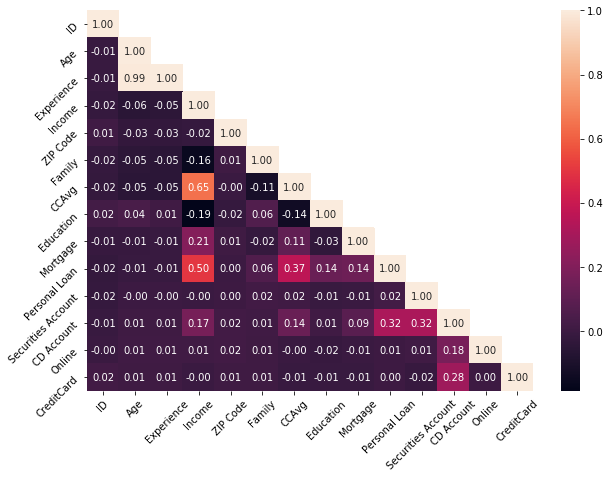

In [10]:
#Design a correlation heat map to understand the correlation within the independent variables.
#This will help us to determine any multicolinearity and remove the same from the dataset for building a better model.
corr = loan_df.corr()
plt.figure(figsize=(10,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f') # Plot the headmap and understand the correlation
labelx = a.set_xticklabels(a.get_xticklabels(), rotation=45)
labely = a.set_yticklabels(a.get_yticklabels(), rotation=45)

Observation: 
We can see that Age and Experience has a very strong correlation of 0.99.  There is a noteable correlation between Income and CCAvg of 0.65.   We also see that Income and Personal Loan has correlation of 0.50.  We can take a decision to remove Age or Experience from the dataset to reduce the multicolinearity.

In [11]:
loan_df.head(5) # Show first 5 records with the column names.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 1.2. Removing Experience, Columns ID and ZIP Code from the Datatset  
Based on the Correlation Analysis we can decide on removing either Age or Experience.  As Experience has negative values we can decide on removing the column and retain age.  In additional Columns ID and ZIP Code are unique to the records and cannot help in the analysis. We are dropping those three fields from the dataset. 


In [0]:
#Dropping the ID and ZIP Code columns as it is not required for analysis
loan_df.drop(labels= "ID" , axis = 1,inplace=True)
loan_df.drop(labels= "ZIP Code" , axis = 1,inplace=True)
loan_df.drop(labels= "Experience" , axis = 1,inplace=True)

In [13]:
#Describing the data to understand the Five Numbers
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


## 1.3 Creating Copy of the base DataFrame to understand the Relationship between Variable

In [14]:
# Creating a Copy of the Data Frame and adding columns to group the Age.  This will help in understanding the plots better.
loan_Copy1 = loan_df
loan_Copy1.loc[loan_Copy1.Age <= 30, 'Age Group'] = '20 - 30' 
loan_Copy1.loc[(loan_Copy1.Age > 30) & (loan_Copy1.Age <= 40), 'Age Group'] = '30 - 40'
loan_Copy1.loc[(loan_Copy1.Age > 40) & (loan_Copy1.Age <= 50), 'Age Group'] = '40 - 50'
loan_Copy1.loc[loan_Copy1.Age > 50, 'Age Group'] = '> 50'

loan_Copy1.head(5) # Show first 5 records with the column names.

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Group
0,25,49,4,1.6,1,0,0,1,0,0,0,20 - 30
1,45,34,3,1.5,1,0,0,1,0,0,0,40 - 50
2,39,11,1,1.0,1,0,0,0,0,0,0,30 - 40
3,35,100,1,2.7,2,0,0,0,0,0,0,30 - 40
4,35,45,4,1.0,2,0,0,0,0,0,1,30 - 40


In [15]:
#Ensuring there are no Null Values in the DataFrame as part of Age Group
loan_null = loan_Copy1.isnull()
loan_null.apply(pd.value_counts)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Group
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


# 2.Study the data distribution in each attribute, share your findings

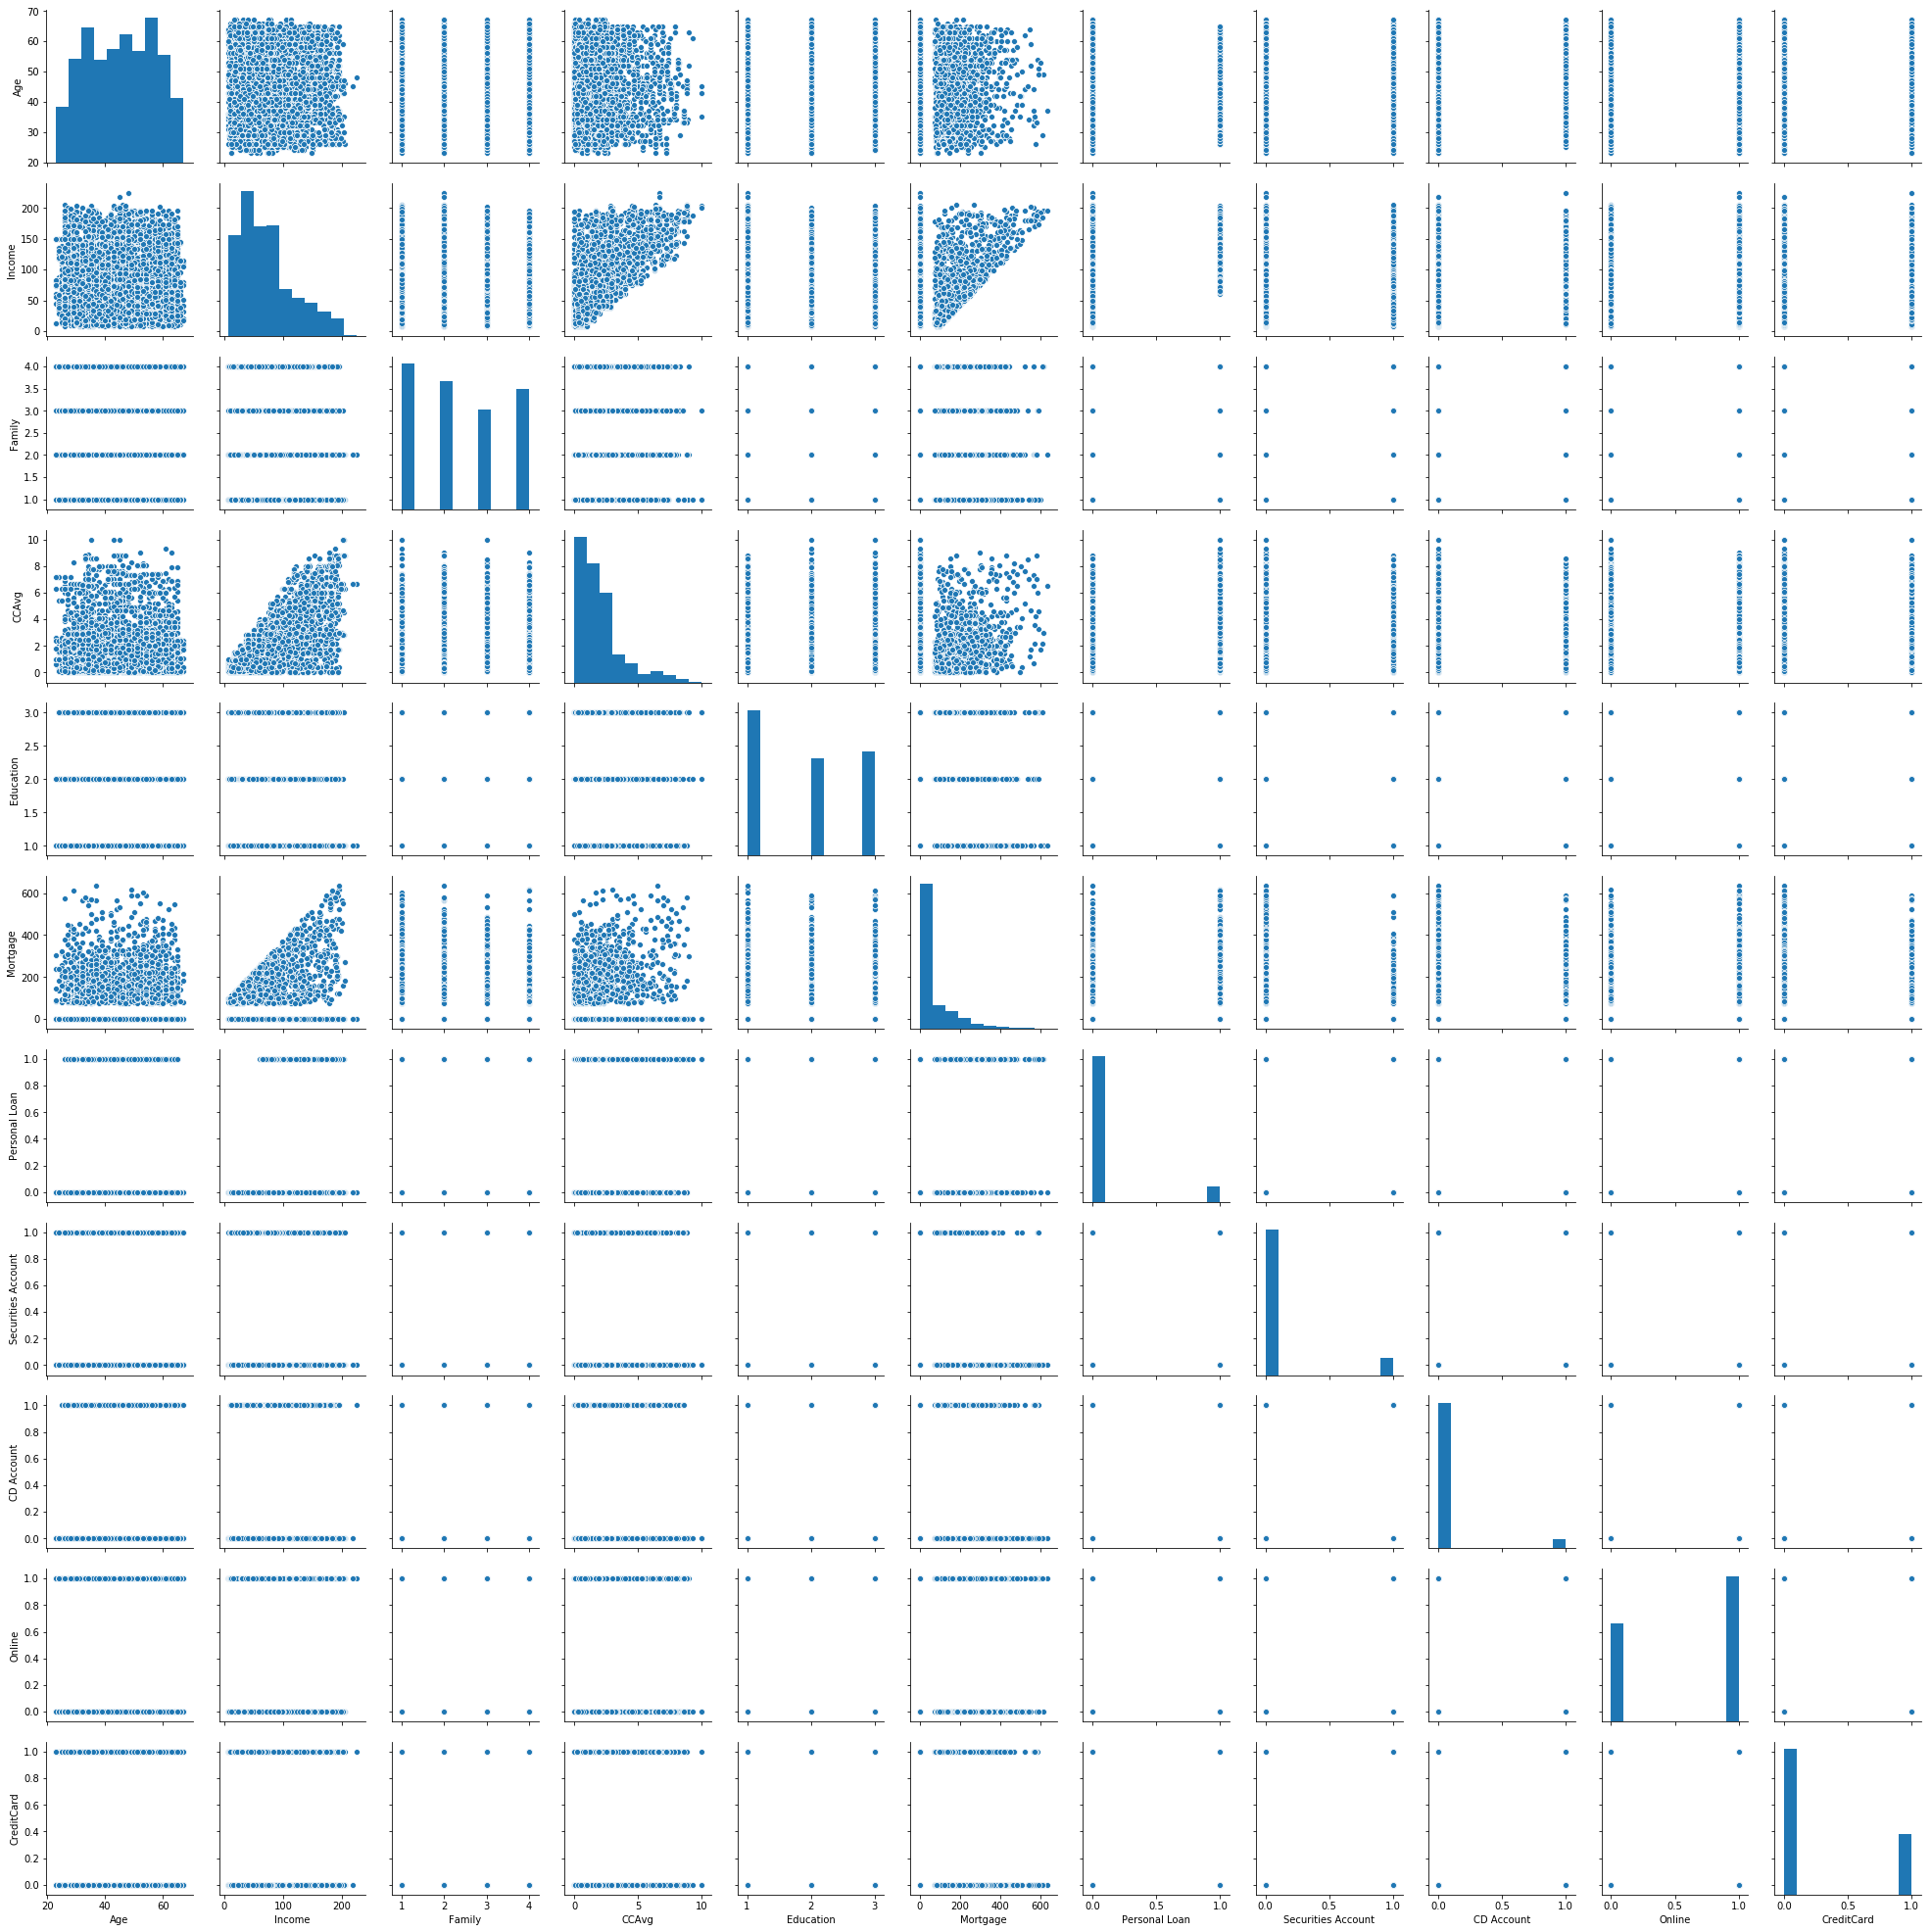

In [16]:
# Use the PairPlot to understand individual variables and its distribution.
sns.pairplot(loan_Copy1)

## Inference from the PairPlot
1. Mortgage increases as income increases
2. Mortgage and CC Avg is concentrated between 100K to 400K Morgage value.
3. Individuals having income >100K are likely to take personal loans.
4. The value for Morgage and CCAvg increases as the income increases.
5. We see a considerable non opters for Morgage for all levels of income.
6. There is a left skew in Income, Mortgage and CC Avg which mean that there is a skewness in the lesser income group / Mortgage / CC Avg.

# 3. Target Column Distribution and comments

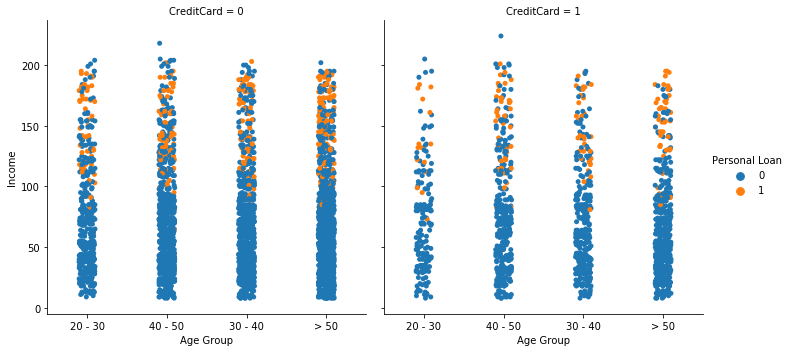

In [17]:
# Using CatPlot to understand the relationship between Age / Income / Credit Card Subscription and the Target variable Personal Loan
sns.catplot(x="Age Group", 
               y="Income", 
               hue="Personal Loan",
               col="CreditCard",
               data=loan_Copy1, 
               kind="strip")

### Inference from the above Graph
Most of the Personal Loan Opters are above the 100K Income Bracket.  Having a Credit Card or not does not seem to influence the Personal Loan decision.  Personal Loan and Credit Card Opters seems to have increasted as the Age increases.  We can see from the data that customers with Age >50 have higher Personal Loan / Credit Card subscriptions. 

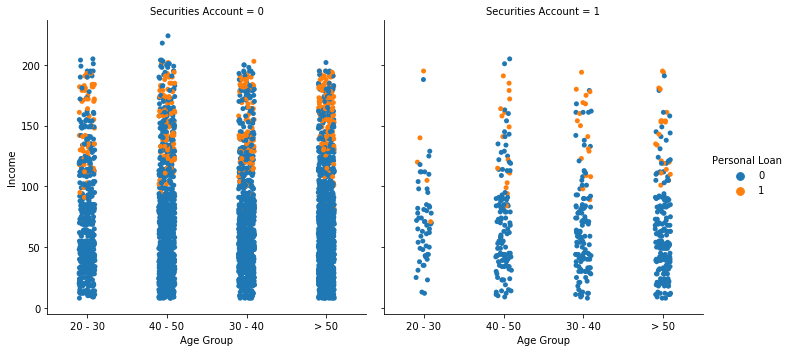

In [18]:
# Using CatPlot to understand the relationship between Age / Income / Securities Account and the Target variable Personal Loan
sns.catplot(x="Age Group", 
               y="Income", 
               hue="Personal Loan",
               col="Securities Account",
               data=loan_Copy1, 
               kind="strip")


### Inference from the above Graph
Holding a Security Account is increasing as the age increases but that does not seem to be impacting the Personal Loan decision.

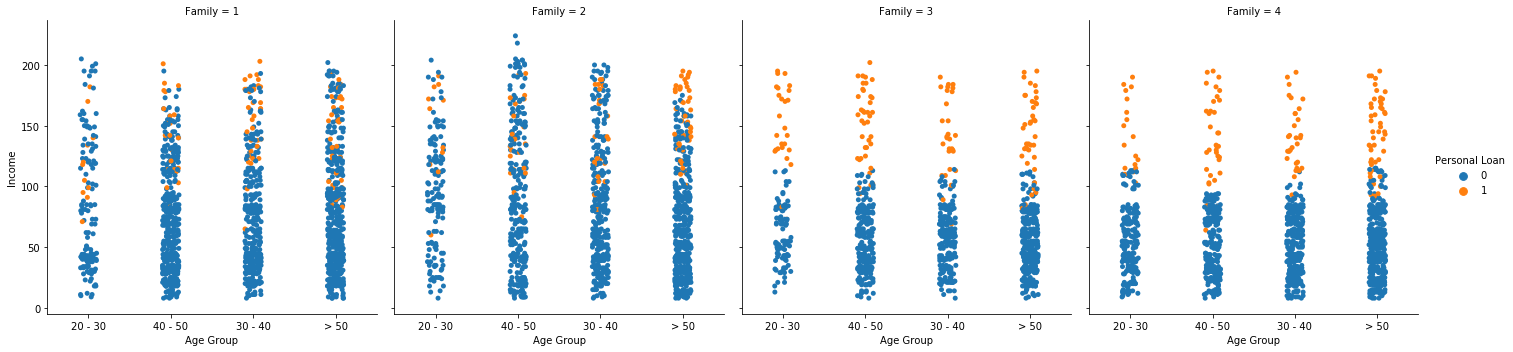

In [19]:
# Using CatPlot to understand the relationship between Age / Income / Family Count and the Target variable Personal Loan
sns.catplot(x="Age Group", 
               y="Income", 
               hue="Personal Loan", 
               col="Family", 
               data=loan_Copy1, 
               kind="strip")

### Inference from the above Graph
Families with 3 or 4 members and income group of >100K seems to avail Personal Loans more than those who have 1 or 2 Family members.  This is clearly shown in the last two strip plots mentioned about.

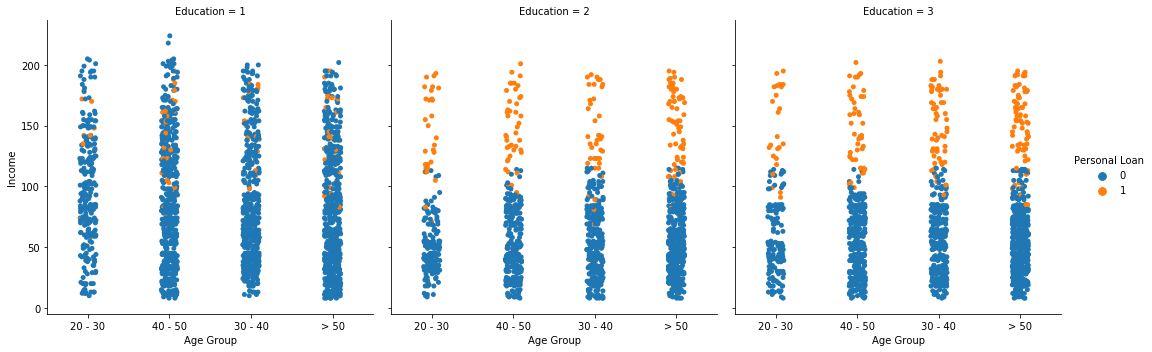

In [20]:
# Using CatPlot to understand the relationship between Age / Income / Education and the Target variable Personal Loan
sns.catplot(x="Age Group", 
               y="Income", 
               hue="Personal Loan", 
               col="Education", 
               data=loan_Copy1, 
               kind="strip")

### Inference from the above Graph
Graduates and Advanced Professionals with income of >100K seems to avail Personal Loans more than under graduates.  This stands out in the last two plots above.

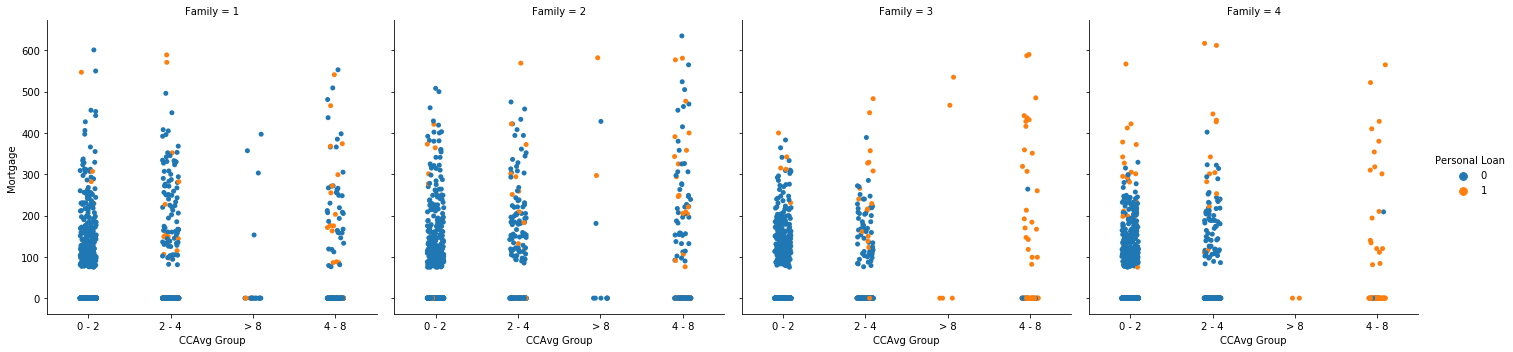

In [21]:
# Using CatPlot to understand the relationship between Age / Income / Family Count and the Target variable Personal Loan

loan_Copy1.loc[loan_Copy1.CCAvg<= 2, 'CCAvg Group'] = '0 - 2' 
loan_Copy1.loc[(loan_Copy1.CCAvg > 2) & (loan_Copy1.CCAvg <= 4), 'CCAvg Group'] = '2 - 4'
loan_Copy1.loc[(loan_Copy1.CCAvg > 4) & (loan_Copy1.CCAvg <= 8), 'CCAvg Group'] = '4 - 8'
loan_Copy1.loc[loan_Copy1.CCAvg > 8, 'CCAvg Group'] = '> 8'
sns.catplot(x="CCAvg Group", 
               y="Mortgage", 
               hue="Personal Loan", 
               col="Family", 
               data=loan_Copy1, 
               kind="strip")

### Inference from the above Graph
As Credit Card Average Monthly spend increases for a familiy of 3 or 4, they tend to take personal loans.  Mortgage value does not seem to have any impact on the personal loan decision as even zero mortgage value seems to have significant Personal loan takers however that increases as the family size increases.

# 4. Split the data into training and test set in the ratio of 70:30 respectively

In [22]:
#Ensuring there are no Null Values in the DataFrame as part of Age Group
print('Split of Loan decisions:\n',loan_df['Personal Loan'].value_counts())
loan_null = loan_df.isnull()
loan_null.apply(pd.value_counts)

Split of Loan decisions:
 0    4520
1     480
Name: Personal Loan, dtype: int64


,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Group,CCAvg Group
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


Observation of the Target Variable Spread:
There is 90:10 split of non takers and takers.  As this is way less than 50% of the data spread, we suggest to perform downsampling of the data and compare actual and Down Sampled data results.

### Down Sample to be done as the ratio of the Target variable is 90:10 ratio.

In [23]:
#DownSample the y values to ensure equal amount of 0's and 1's are used for prediction.

# Indicies of each class' observations
i_class0 = loan_df[loan_df['Personal Loan'] == 0]
i_class1 = loan_df[loan_df['Personal Loan'] == 1]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# Downsample majority class
i_class0_downsampled = resample(i_class0, 
                                 replace=False,    # sample without replacement
                                 n_samples=n_class1,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([i_class0_downsampled, i_class1])
 
# Display new class counts
df_downsampled['Personal Loan'].value_counts()


1    480
0    480
Name: Personal Loan, dtype: int64

In [0]:
# X and y Values for Logistics Regression - Actual Data

X_L = loan_df.drop(['Personal Loan','Age Group','CCAvg Group'], axis=1) # Copy all except Personal Loan Column to X as Personal Loan is our Target Variable
y_L = loan_df[['Personal Loan']] # Copy the Target Variable Personal Loan to y

# X and y Values for Logistics Regression - Down Sampled Data

X_L_DS = df_downsampled.drop(['Personal Loan','Age Group','CCAvg Group'], axis=1) # Copy all except Personal Loan Column to X as Personal Loan is our Target Variable
y_L_DS = df_downsampled[['Personal Loan']] # Copy the Target Variable Personal Loan to y

# X and y Values for Naive Bayes Regression - Actual Data

X_N = loan_df.drop(['Personal Loan','Age Group','CCAvg Group'], axis=1) # Copy all except Personal Loan Column to X as Personal Loan is our Target Variable
y_N = loan_df[['Personal Loan']] # Copy the Target Variable Personal Loan to y

# X and y Values for Naive Bayes Regression - Down Sampled Data

X_N_DS = df_downsampled.drop(['Personal Loan','Age Group','CCAvg Group'], axis=1) # Copy all except Personal Loan Column to X as Personal Loan is our Target Variable
y_N_DS = df_downsampled[['Personal Loan']] # Copy the Target Variable Personal Loan to y

# X and y Values for KNN Regression - Actual Data

X_K = loan_df.drop(['Personal Loan','Age Group','CCAvg Group'], axis=1) # Copy all except Personal Loan Column to X as Personal Loan is our Target Variable
y_K = loan_df[['Personal Loan']] # Copy the Target Variable Personal Loan to y

# X and y Values for KNN Regression - Down Sampled Data

X_K_DS = df_downsampled.drop(['Personal Loan','Age Group','CCAvg Group'], axis=1) # Copy all except Personal Loan Column to X as Personal Loan is our Target Variable
y_K_DS = df_downsampled[['Personal Loan']] # Copy the Target Variable Personal Loan to y


In [0]:
#Break the X and y dataframes into training set and test set using sklearn package's data splitting function. 
# Use Random state to 1 as we would need the same sample everytime we pull.

# for Logistic Regression Actual and Down Sampled
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X_L, y_L, test_size=0.30, random_state=1) 
X_trainLDS, X_testLDS, y_trainLDS, y_testLDS = train_test_split(X_L_DS, y_L_DS, test_size=0.30, random_state=1)

# for Naive Bayes Actual and Down Sampled
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X_N, y_N, test_size=0.30, random_state=1) 
X_trainNDS, X_testNDS, y_trainNDS, y_testNDS = train_test_split(X_N_DS, y_N_DS, test_size=0.30, random_state=1)

# for KNN Actual and Down Sampled
X_trainK, X_testK, y_trainK, y_testK = train_test_split(X_K, y_K, test_size=0.30, random_state=1) 
X_trainKDS, X_testKDS, y_trainKDS, y_testKDS = train_test_split(X_K_DS, y_K_DS, test_size=0.30, random_state=1)

# 5. Use different classification models

## 5a.1 Logistics Regression Model with Actual Sample
Using the Logistics Regression Model perform the prediction for a Liability Customer to be taking a personal loan.

In [26]:
# invoke the Logistics Regression function and find the bestfit model on training data. Fit the model on 30%
# Using the ravel() to avoid a warning due to 1D array for y values

model = LogisticRegression()
model.fit(X_trainL, y_trainL.values.ravel())
y_predictL = model.predict(X_testL)
print('Logistic Regression Score for Training set =',model.score(X_trainL, y_trainL))
print('Logistic Regression Score for Test set =',model.score(X_testL, y_testL))
print(metrics.classification_report(y_testL, y_predictL))

Logistic Regression Score for Training set = 0.9491428571428572
Logistic Regression Score for Test set = 0.9426666666666667
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.51      0.64       149

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score seems to predict the O(No) better than 1(Yes).  This is primarily because of the Imbalance in the dataset.  With this setup it looks like the model seems to correctly predict the 1's 64% of the time and 0s 97% of the time correctly.


## 5a.2 Logistics Regression Model with Down Sample

In [27]:

# invoke the Logistics Regression function and find the bestfit model on training data. Fit the model on 30%

model = LogisticRegression()
model.fit(X_trainLDS, y_trainLDS.values.ravel())
y_predictLDS = model.predict(X_testLDS)

print('Logistic Regression Score of Downsampled Training set =',model.score(X_trainLDS, y_trainLDS))
print('Logistic Regression Score of Downsampled Test set =',model.score(X_testLDS, y_testLDS))

print(metrics.classification_report(y_testLDS, y_predictLDS))


Logistic Regression Score of Downsampled Training set = 0.8869047619047619
Logistic Regression Score of Downsampled Test set = 0.8854166666666666
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       140
           1       0.90      0.88      0.89       148

    accuracy                           0.89       288
   macro avg       0.89      0.89      0.89       288
weighted avg       0.89      0.89      0.89       288



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The Imbalance in the data was corrected performing downsampling.  With this setup it looks like the model seems to correctly predict the 1's 88% of the time and 0s 89% of the time correctly.

## 5b.1 Naive Bayes Model with Actual Sample

In [28]:
model = GaussianNB()
model.fit(X_trainN, y_trainN.values.ravel())
print(model)
# make predictions
y_predictN = model.predict(X_testN)
# summarize the fit of the model
print('Naive Bayes Score for Training set =',model.score(X_trainN, y_trainN))
print('Naive Bayes Score for Test set =',model.score(X_testN, y_testN))
print(metrics.classification_report(y_testN, y_predictN))

GaussianNB(priors=None, var_smoothing=1e-09)
Naive Bayes Score for Training set = 0.8894285714285715
Naive Bayes Score for Test set = 0.8746666666666667
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



The score seems to predict the O(No) better than 1(Yes).  This is primarily because of the Imbalance in the dataset.  With this setup it looks like the model seems to correctly predict the 1's 47% of the time and 0s 93% of the time correctly.

## 5b.2 Naive Bayes Model with Down Sample

In [29]:
model = GaussianNB()
model.fit(X_trainNDS, y_trainNDS.values.ravel())
print(model)
# make predictions
y_predictNDS = model.predict(X_testNDS)

# summarize the fit of the model
print('Naive Bayes DownSampled Score for Training set =',model.score(X_trainNDS, y_trainNDS))
print('Naive Bayes DownSampled Score for Test set =',model.score(X_testNDS, y_testNDS))
print(metrics.classification_report(y_testNDS, y_predictNDS))

GaussianNB(priors=None, var_smoothing=1e-09)
Naive Bayes DownSampled Score for Training set = 0.8303571428571429
Naive Bayes DownSampled Score for Test set = 0.8125
              precision    recall  f1-score   support

           0       0.76      0.91      0.82       140
           1       0.89      0.72      0.80       148

    accuracy                           0.81       288
   macro avg       0.82      0.82      0.81       288
weighted avg       0.83      0.81      0.81       288



The Imbalance in the data was corrected performing downsampling.  With this setup it looks like the model seems to correctly predict the 1's 81% of the time and 0s 82% of the time correctly.

## 5c.1 KNN Model with Actual Sample

In [30]:
model = KNeighborsClassifier(n_neighbors= 70 , weights = 'distance' )
model.fit(X_trainK, y_trainK.values.ravel())
print(model)
# make predictions
y_predictK = model.predict(X_testK)
# summarize the fit of the model
print('KNN Score for Training set =',model.score(X_trainK, y_trainK))
print('KNN Score for Test set =',model.score(X_testK, y_testK))
print(metrics.classification_report(y_testK, y_predictK))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=70, p=2,
                     weights='distance')
KNN Score for Training set = 1.0
KNN Score for Test set = 0.9033333333333333
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1351
           1       0.56      0.13      0.21       149

    accuracy                           0.90      1500
   macro avg       0.74      0.56      0.58      1500
weighted avg       0.88      0.90      0.87      1500



    The score seems to predict the O(No) better than 1(Yes).  This is primarily because of the Imbalance in the dataset.  With this setup it looks like the model seems to correctly predict the 1's 21% of the time and 0s 95% of the time correctly. K value is chosen based on Sqrt(n) as there two classes.

## 5c.2 KNN Model with Down Sample

In [31]:
model = KNeighborsClassifier(n_neighbors= 20 , weights = 'distance' )
model.fit(X_trainKDS, y_trainKDS.values.ravel())
print(model)
# make predictions
y_predictKDS = model.predict(X_testKDS)
# summarize the fit of the model
print('KNN Downsampled Score for Training set =',model.score(X_trainKDS, y_trainKDS))
print('KNN Downsampled Score for Test set =',model.score(X_testKDS, y_testKDS))
print(metrics.classification_report(y_testKDS, y_predictKDS))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')
KNN Downsampled Score for Training set = 1.0
KNN Downsampled Score for Test set = 0.875
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       140
           1       0.85      0.93      0.88       148

    accuracy                           0.88       288
   macro avg       0.88      0.87      0.87       288
weighted avg       0.88      0.88      0.87       288



The Imbalance in the data was corrected performing downsampling.  With this setup it looks like the model seems to correctly predict the 1's 87% of the time and 0s 86% of the time correctly.  K value is chosen based on Sqrt(n) as there two classes.

Observation:  Precision and Recall looks better and improved in Down Sample when compared with Actual Sample.  

## 6. Confusion metrics for all the models

In [33]:
print('Logistic Regression Actual Sample:\n',metrics.confusion_matrix(y_testL['Personal Loan'], y_predictL))
print('Naive Bayes Actual Sample:\n',metrics.confusion_matrix(y_testN, y_predictN))
print('KNN Actual Sample:\n',metrics.confusion_matrix(y_testK, y_predictK))
print('---------------------------------')
print('Logistic Regression Down Sample:\n',metrics.confusion_matrix(y_testLDS['Personal Loan'], y_predictLDS))
print('Naive Bayes Down Sample:\n',metrics.confusion_matrix(y_testNDS, y_predictNDS))
print('KNN Down Sample:\n',metrics.confusion_matrix(y_testKDS, y_predictKDS))

Logistic Regression Actual Sample:
 [[1338   13]
 [  73   76]]
Naive Bayes Actual Sample:
 [[1227  124]
 [  64   85]]
KNN Actual Sample:
 [[1336   15]
 [ 130   19]]
---------------------------------
Logistic Regression Down Sample:
 [[125  15]
 [ 18 130]]
Naive Bayes Down Sample:
 [[127  13]
 [ 41 107]]
KNN Down Sample:
 [[115  25]
 [ 11 137]]


In [34]:
# Prepare new Dataframe which will help in comparting the Target Variable against the predictions done by diff models.

#Actual Sample Prediction
y_Compare = y_testL
y_Compare['Log Predict']=y_predictL
y_Compare['Naive Predict']=y_predictN
y_Compare['KNN Predict']=y_predictK


#Down Sample Prediction
y_CompareDS = y_testLDS
y_CompareDS['Log Predict']=y_predictLDS
y_CompareDS['Naive Predict']=y_predictNDS
y_CompareDS['KNN Predict']=y_predictKDS


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [35]:
y_Compare.apply(pd.value_counts)

,Personal Loan,Log Predict,Naive Predict,KNN Predict
0,1351,1411,1291,1466
1,149,89,209,34


### Actual Sample Observation: 
Logistics Regression to have better results in identifying the customers who will opt for personal loan over KNN and Naive Bayes Models.  However as the Recall and Precision seems to be low for determining a personal loan opter we will have to look at downsampling results too.

In [36]:
y_CompareDS.apply(pd.value_counts)

,Personal Loan,Log Predict,Naive Predict,KNN Predict
0,140,143,168,126
1,148,145,120,162


### Down Sample Observation: 
Logistics Regression seems to fair better than KNN and Naive Bayes. Logistics Regression seems to have better results in identifying the customers who will opt for personal loan over KNN and Naive Bayes Models.  Recall and Precision seems to be better for determining a personal loan opter when we use downsampling.

## 7. Conclusion on the Best Model

Based on the Data Analysis and Down Sampling it looks like Logistics Regression better results in identifying the customers who will opt for personal loan over KNN and Naive Bayes Models.  Recall and Precision seems to be better for determining a personal loan opter when we use downsampling.